https://blog.paperspace.com/train-keras-models-using-genetic-algorithm-with-pygad/

In [1]:
import pygad.kerasga
import numpy as np
import pandas as pd
import keras as ker
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

# Quitar warnings feos
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
#Misma idea que pr1

iris_RAW = pd.read_csv('../Data/iris.data', sep=',')
iris_OG = iris_RAW.copy()
salidas = iris_RAW.pop("class")

In [3]:
#Misma idea que pr1
entradas = iris_RAW.to_numpy()
mm = MinMaxScaler()
entradas = mm.fit_transform(entradas)

"""
# Categorizamos salidas
label_encoder = LabelEncoder()
salidas = label_encoder.fit_transform(salidas)
"""
salidas = pd.get_dummies(salidas)

In [4]:
#Misma idea que pr1
def crearMLP(ngenesMLP, tam_entrada,tipo,pesos):

    MLP = ker.Sequential() # Creamos el modelo vacío

    # Añadimos la primera capa (tecnicamente dos, la de entrada (con la variable input_dim) y la oculta)
    MLP.add(ker.layers.Dense(ngenesMLP, input_dim = tam_entrada, activation='relu'))

    # Añadimos la capa de salida
    MLP.add(ker.layers.Dense(3,activation='sigmoid')) 

    # Por último tenemos que configurar el modelo antes de entrenarlo con lo dicho en el enunciado
    # Optimizador: Adam
    # Función error: Mean Squared Error
    # Metricas = Binary accuracy porque nos da el número de precisión de la red
    MLP.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])

    if(tipo == 1): # Le metemos pesos ya predeterminados
        MLP.set_weights(pesos)

    return MLP

In [5]:
#Misma idea que pr1
ngenes = 8 # NO TOCAR
model = crearMLP(ngenes,4,0,0)

In [6]:
#Crea 10 individuos de tipo model
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=50)

In [7]:
#Funcion de fitness parametros obligatorios el individuo y su index (no se pueden usar mas)
def fitness_func(solution, sol_idx):
    global entradas, salidas, keras_ga, model #Uso la varables globales para no parametrizar

    # Devuelve los pesos de la solucion (individuo) enbase a model es decir camvia un 1D vector que usa pygad a una matriz de pesos tipo model
    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                weights_vector=solution) 
    model.set_weights(weights=model_weights_matrix) # Adjuntamos los pesos al model para poder evaluarlo

    solution_fitness = model.evaluate(entradas, salidas,verbose=0)[1] #evaluamos usando solo usamos el accuracy

    return solution_fitness # devolvemos

In [8]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [9]:
num_generations = 100
num_parents_mating = 25
probabilidad_mutacion = 0.05
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       mutation_probability = probabilidad_mutacion,
                       parent_selection_type="rws", #ruleta
                       crossover_type = None,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

In [10]:
ga_instance.run()

Generation = 1
Fitness    = 0.6666666865348816
Generation = 2
Fitness    = 0.6666666865348816
Generation = 3
Fitness    = 0.6666666865348816
Generation = 4
Fitness    = 0.6666666865348816
Generation = 5
Fitness    = 0.6666666865348816
Generation = 6
Fitness    = 0.6666666865348816
Generation = 7
Fitness    = 0.6666666865348816
Generation = 8
Fitness    = 0.6666666865348816
Generation = 9
Fitness    = 0.6666666865348816
Generation = 10
Fitness    = 0.6600000262260437
Generation = 11
Fitness    = 0.6666666865348816
Generation = 12
Fitness    = 0.6666666865348816
Generation = 13
Fitness    = 0.7066666483879089
Generation = 14
Fitness    = 0.7066666483879089
Generation = 15
Fitness    = 0.7066666483879089
Generation = 16
Fitness    = 0.7066666483879089
Generation = 17
Fitness    = 0.7066666483879089
Generation = 18
Fitness    = 0.7333333492279053
Generation = 19
Fitness    = 0.753333330154419
Generation = 20
Fitness    = 0.7333333492279053
Generation = 21
Fitness    = 0.7333333492279053
Ge

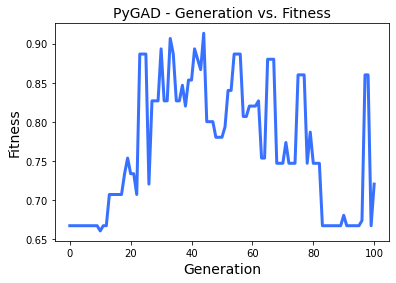

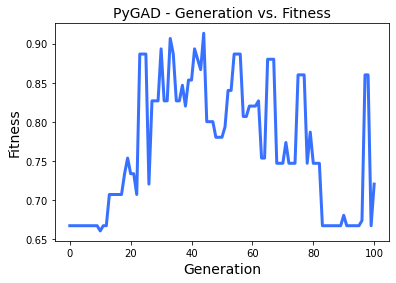

In [11]:
ga_instance.plot_fitness()